In [123]:
import os
import json
import glob
from matplotlib import pyplot as plt
import numpy as np

In [124]:
pwd

'/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations'

In [125]:
main_dir = '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations'

In [126]:
sub_dirs = sorted(glob.glob(os.path.join(main_dir, "4_*")))

print(f"sds:{sub_dirs}")

sds:['/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_10', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_11', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_12', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_13', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_14', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_15', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_16', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_4', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_5', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_6', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_7', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_8', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_9']


In [127]:
casci_errors ={}
casscf_errors ={}

In [128]:
reference_dir =os.path.join(main_dir,"4_16")
ref_file = os.path.join(reference_dir,"new_data.json")

In [129]:
if not os.path.exists(ref_file):
    raise FileNotFoundError(f"Reference file not found:{Ref_file}")

with open(ref_file, 'r') as file:
    ref_data = json.load(file)
    ref_casci_energies = np.array(ref_data["return_results"]['casci_energies'])
    ref_casscf_energies = np.array(ref_data["return_results"]['casscf_energies'])
    #print(f"rc{ref_casci_energies}")
    #print(f"rf{ref_casscf_energies}")
for sub_dir_path in sub_dirs:
    sub_dir_name = os.path.basename(sub_dir_path)
    active_space = int(sub_dir_name.split("_")[1])
    json_file = os.path.join(sub_dir_path,"new_data.json")
    if not os.path.exists(json_file):
        continue

    
        

    with open(json_file,'r') as file:
        data = json.load(file)
        casci_energies = np.array(data["return_results"]["casci_energies"])
        casscf_energies = np.array(data["return_results"]["casscf_energies"])
        #print(sub_dir_name)
        #print(f"casci_energies {casci_energies}")
        #print(f" casscf_energies {casscf_energies}")
    

        casci_error = np.array([ref - value for ref,value in zip(ref_casci_energies,casci_energies)])
        casscf_error = np.array([ref - value for ref,value in zip(ref_casscf_energies,casscf_energies)])
        #print(f"Active space{active_space} CASCI errors: {casci_error}")
        
       

        casci_errors[active_space] = casci_error[:, 0]
        casscf_errors[active_space] = casscf_error[:, 0]
        
        print(type(casci_error))
        print(f"Active space{active_space} CASCI errors: {casci_error}")
        print(f"Active space{active_space} CASSCF errors: {casscf_error}")


<class 'numpy.ndarray'>
Active space10 CASCI errors: [[-0.03156101 -0.03285881 -0.04002982]
 [-0.03089614 -0.03227219 -0.04032596]
 [-0.03076743 -0.03286831 -0.0395046 ]
 [-0.03087841 -0.03451366 -0.03754077]
 [-0.03103167 -0.03652856 -0.03497901]
 [-0.0312032  -0.03762672 -0.03315865]
 [-0.03149184 -0.03776507 -0.03236314]
 [-0.03201594 -0.03751308 -0.03228438]
 [-0.03284291 -0.03721513 -0.03271931]
 [-0.03397489 -0.03699511 -0.03354696]]
Active space10 CASSCF errors: [[-0.00075617 -0.0008862  -0.00090286]
 [-0.00077781 -0.00089607 -0.0008715 ]
 [-0.0008276  -0.00094025 -0.00070138]
 [-0.00074477 -0.00083638 -0.00061202]
 [-0.00063213 -0.00070672 -0.00053707]
 [-0.00053011 -0.00060505 -0.00045438]
 [-0.00044857 -0.00053226 -0.00038289]
 [-0.00065467 -0.00064641  0.01483412]
 [-0.00062766 -0.00059738  0.02441091]
 [-0.00060733 -0.00054132  0.03249395]]
<class 'numpy.ndarray'>
Active space11 CASCI errors: [[-0.02705626 -0.02816604 -0.03408745]
 [-0.02637823 -0.02742528 -0.03398315]
 [-0

In [130]:
casci_min_max_diff = {}
casscf_min_max_diff = {} 

for active_space,errors in casci_errors.items():
    casci_min_max_diff[active_space] = np.max(errors) - np.min(errors)
    print(f"CASCI - Active space: {active_space}, Errors: {errors}")
 

for active_space,errors in casscf_errors.items():
    casscf_min_max_diff[active_space] = np.max(errors) - np.min(errors)
    print(f"CASSCF - Active space: {active_space}, Errors: {errors}")

    #print(f"CASCI min-max differences: {casci_min_max_diff}")
    #print(f"CASSCF min-max differences: {casscf_min_max_diff}")

CASCI - Active space: 10, Errors: [-0.03156101 -0.03089614 -0.03076743 -0.03087841 -0.03103167 -0.0312032
 -0.03149184 -0.03201594 -0.03284291 -0.03397489]
CASCI - Active space: 11, Errors: [-0.02705626 -0.02637823 -0.0267932  -0.02783135 -0.02923375 -0.03079193
 -0.03108686 -0.03161105 -0.03243456 -0.03356046]
CASCI - Active space: 12, Errors: [-0.02617598 -0.02570741 -0.02625422 -0.02736783 -0.02880922 -0.03038477
 -0.03068584 -0.03121008 -0.03203014 -0.03315   ]
CASCI - Active space: 13, Errors: [-0.02531586 -0.02504866 -0.02572293 -0.02690978 -0.02838915 -0.02912623
 -0.02787257 -0.02815353 -0.02956699 -0.03154892]
CASCI - Active space: 14, Errors: [-0.01811015 -0.01749549 -0.01687723 -0.01640673 -0.01608262 -0.01585424
 -0.01567446 -0.01552175 -0.01539377 -0.01529228]
CASCI - Active space: 15, Errors: [-0.01378206 -0.01378153 -0.01371964 -0.01369292 -0.01368361 -0.0136765
 -0.01367192 -0.01367028 -0.01366845 -0.01366441]
CASCI - Active space: 16, Errors: [0. 0. 0. 0. 0. 0. 0. 0. 0

a:[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
cassci: {10: 0.0032074646658193373, 11: 0.00718222419872383, 12: 0.007442583543278758, 13: 0.006500257494390205, 14: 0.0028178738674462522, 15: 0.00011765168809318993, 16: 0.0, 4: 0.019678301618043292, 5: 0.01963730145881204, 6: 0.015436450754652498, 7: 0.007642696910475699, 8: 0.00812034629037317, 9: 0.008582393844021041}
casscf: {10: 0.00037903026851893173, 11: 0.00018694798159568649, 12: 0.0004087669101267011, 13: 0.000140711863052978, 14: 2.345501108091952e-05, 15: 3.7264767671629784e-06, 16: 0.0, 4: 0.003045351741175928, 5: 0.01414111283206232, 6: 0.0022500149274460313, 7: 0.0016566673684819122, 8: 0.0009610256746324097, 9: 0.0006342593053147993}


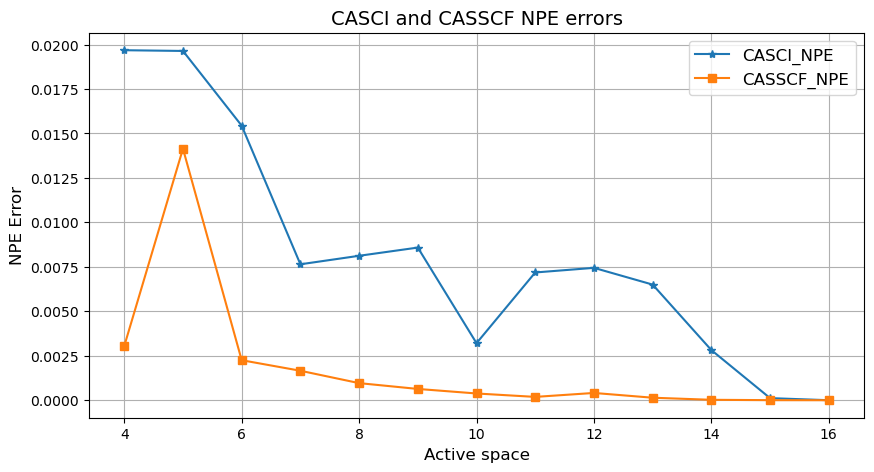

In [131]:
plt.figure(figsize =(10,5))
plt.plot(
    sorted(casci_min_max_diff.keys()),
    [casci_min_max_diff[space] for space in sorted(casci_min_max_diff.keys())],
    label ="CASCI_NPE", marker ='*'
)


plt.plot(
     sorted(casscf_min_max_diff.keys()),
    [casscf_min_max_diff[space] for space in sorted(casscf_min_max_diff.keys())],
    label ="CASSCF_NPE", marker ='s'
)
a = sorted(casscf_min_max_diff.keys())
print(f"a:{a}")

print(f"cassci: {casci_min_max_diff}")
print(f"casscf: {casscf_min_max_diff}")

plt.legend(fontsize=12)
plt.grid(True)
plt.title("CASCI and CASSCF NPE errors", fontsize=14)
plt.xlabel("Active space", fontsize=12)
plt.ylabel("NPE Error", fontsize=12)
plt.show()